<a href="https://colab.research.google.com/github/Sakshar95/Sakshar95/blob/main/Sakshar_Bhardwaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Datasets

In [11]:
citycounty_df = pd.read_csv('citycounty.csv')
fastfood_df   = pd.read_csv('fastFood_NJ.csv')

In [12]:
citycounty_df

,City,County
0,Egg Harbor Township,Atlantic
1,Atlantic City,Atlantic
2,Galloway Township,Atlantic
3,Hamilton Township,Atlantic
4,Pleasantville,Atlantic
...,...,...
564,Hardwick Township,Warren
565,North Cape May,Cape May
566,Rio Grande,Cape May
567,Cape May Court House,Cape May


In [13]:
citycounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    569 non-null    object
 1   County  569 non-null    object
dtypes: object(2)
memory usage: 9.0+ KB


In [72]:
citycounty_df.rename(columns={'City': 'city', 'County': 'county'}, inplace=True)

In [73]:
citycounty_df.head()

,city,county
0,Egg Harbor Township,Atlantic
1,Atlantic City,Atlantic
2,Galloway Township,Atlantic
3,Hamilton Township,Atlantic
4,Pleasantville,Atlantic


In [74]:
fastfood_df

,name,categories,reviews,rating,price,latitude,longitude,address
0,akroteria outdoor food court,"Fast Food,Food Court",7,2.0,$,38.930447,-74.922701,"309 Beach Ave, Cape May, NJ08204"
1,dairy queen,"Ice Cream & Frozen Yogurt,Fast Food",15,3.5,$,38.932155,-74.923594,"320 Washington St, Sea Isle City, NJ08243"
2,mcdonald's,"Burgers,Fast Food,Coffee & Tea",12,2.5,$,38.973801,-74.942000,"3857 Bayshore Rd, North Cape May, NJ08204"
3,curley's fries,Fast Food,77,4.0,$,38.986514,-74.810849,"3501 Boardwalk, Wildwood, NJ08260"
4,paul's idaho potatoes,Fast Food,3,5.0,$$,38.989370,-74.804480,"2701 Boardwalk, Wildwood, NJ08260"
...,...,...,...,...,...,...,...,...
1778,dairy queen ltd brazier,"Ice Cream & Frozen Yogurt,Fast Food",17,2.0,$,41.195624,-74.493111,"260 State Rt 94, Vernon, NJ07462"
1779,taco bell,"Fast Food,Mexican",34,1.0,$,41.199295,-74.487511,"297 Route 94, Vernon, NJ07462"
1780,burger king,"Burgers,Fast Food",22,1.5,$,41.198480,-74.482296,"314 Route 94, Vernon, NJ07462"
1781,dairy queen,"Ice Cream & Frozen Yogurt,Fast Food,Burgers",11,3.5,$,41.349180,-74.686735,"17 State Route 23, Montague, NJ07827"


In [75]:
fastfood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        1783 non-null   object 
 1   categories  1783 non-null   object 
 2   reviews     1783 non-null   int64  
 3   rating      1783 non-null   float64
 4   price       1391 non-null   object 
 5   latitude    1783 non-null   float64
 6   longitude   1783 non-null   float64
 7   address     1783 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 111.6+ KB


In [76]:
def parseCityAddress(address):
    try:
        parts = address.split(',')
        # Format in data -- [street, city, state zip]
        city = parts[1].strip()
        return city
    except:
        return address

# 1. Scatter plot for Latitude and Longitude

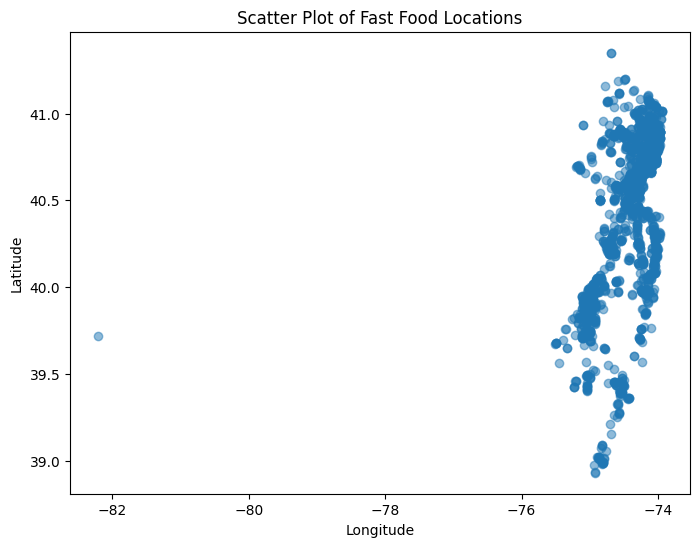

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(fastfood_df['longitude'], fastfood_df['latitude'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Fast Food Locations")
plt.show()

#Boxplot for Reviews

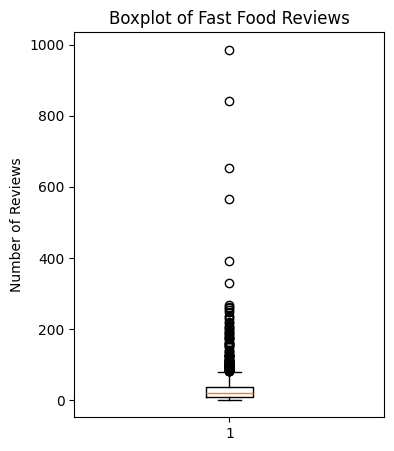

In [16]:
plt.figure(figsize=(4,5))
plt.boxplot(fastfood_df['reviews'].dropna())
plt.title("Boxplot of Fast Food Reviews")
plt.ylabel("Number of Reviews")
plt.show()


# Create a city column from the address

#2. City with the most McDonald's, Burger King, Subway, Wendy's

In [34]:
fastfood_df['name'] = fastfood_df['name'].str.lower()
chains = ['mcdonald', 'burger king', 'subway', "wendy"]
city_counts = {}

for chain in chains:
    city_counts[chain] = fastfood_df[fastfood_df['name'].str.contains(chain)].groupby('address').size()

most_mcdonalds = city_counts['mcdonald'].idxmax()
most_burger_king = city_counts['burger king'].idxmax()
most_subway = city_counts['subway'].idxmax()
most_wendy = city_counts['wendy'].idxmax()

print("City with most McDonald's:", most_mcdonalds)
print("City with most Burger King:", most_burger_king)
print("City with most Subway:", most_subway)
print("City with most Wendy's:", most_wendy)



City with most McDonald's: 1 Garden State Plz, Paramus, NJ07652
City with most Burger King: HMS Host Vince Lombardi Travel Plaz, Ridgefield, NJ07657
City with most Subway: 1 Tree Farm Rd, Pennington, NJ08534
City with most Wendy's: 3 Brewster Rd, Newark, NJ07114


# 3. Compare rating of fast food chains

In [26]:
rating_df = fastfood_df[fastfood_df['name'].str.contains("mcdonald|burger king|subway|wendy|kfc|pizza hut")]
ratings = rating_df.groupby('name')['rating'].mean()
print("Average Rating:")
print(ratings.sort_values())

Average Rating:
name
mcdonald‚äôs      1.000000
wendy's ramsey    1.000000
wendys            1.000000
pizza hut         1.860465
mcdonald's        1.943580
kfc               1.955357
burger king       1.970430
wendy's           2.183333
subway            2.264706
Name: rating, dtype: float64


# 4. Highest rated Sandwich restaurant

In [35]:
sandwich_df = fastfood_df[fastfood_df['categories'].str.contains("Sandwiches", na=False)]
highest_sanswich = sandwich_df.loc[sandwich_df['rating'].idxmax()]
print("Highest Rated Sandwich Restaurant:", highest_sanswich['name'], "with rating", highest_sanswich['rating'])

Highest Rated Sandwich Restaurant: subway with rating 5.0


# 5. Boxplot of reviews by categories

<Figure size 2000x1000 with 0 Axes>

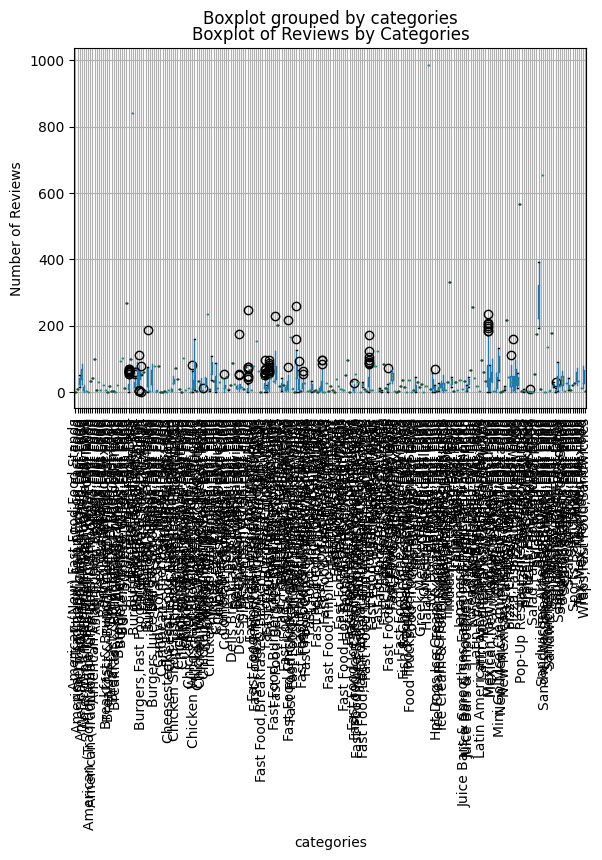

In [42]:
plt.figure(figsize=(20,10))
fastfood_df.boxplot(column='reviews', by='categories', rot=90)
plt.title("Boxplot of Reviews by Categories" )
plt.ylabel("Number of Reviews")
plt.show()

# 6. McDlonald's in Middlesex county, CSV file

In [86]:
fastfood_df['city'] = fastfood_df['address'].apply(parseCityAddress)

merged_df = pd.merge(
    fastfood_df,
    citycounty_df,
    how='left',
    on='city'
)

mask_mcd = merged_df['name'].str.lower().str.contains("mcdonald's", na=False)
mask_mid = merged_df['county'].str.lower() == 'middlesex' # Fixed indentation
mcd_middlesex_df = merged_df[mask_mcd & mask_mid] # Fixed indentation



In [87]:
mcd_middlesex_df.to_csv('mcdonalds_middlesex.csv', index=False)
print("\nMcDonald's in Middlesex County has been saved to 'mcdonalds_middlesex.csv'.")


McDonald's in Middlesex County has been saved to 'mcdonalds_middlesex.csv'.
